In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
NEG_FILE = './data/035_PESI_nEpE_QC4_R2_Seg2Ev1.JDX'
POS_FILE = './data/035_PESI_nEpE_QC4_R2_Seg4Ev1.JDX'

In [3]:
def file2dataframe(file, mode):
    with open(file) as fp:
        mode_list = []
        scan_list = []
        time_list = []
        tic_list = []
        x_list, y_list = [],[]
        for cnt, line in enumerate(fp):
            if line.startswith('##SCAN_NUMBER= '):
                scan = int(line.strip().split('##SCAN_NUMBER= ')[1])
                #print("SCAN: ", scan)
            if line.startswith('##RETENTION_TIME= '):
                time = float(line.strip().split('##RETENTION_TIME= ')[1])
                #print("TIME: ", time)
            if line.startswith('##TIC= '):
                tic = int(line.strip().split('##TIC= ')[1])
                #print("TIC: ", tic)
            if line[0].isdigit():
                x,y = line.strip().split(',')
                x = float(x)
                y = int(y)
                mode_list.append(mode)
                scan_list.append(scan)
                time_list.append(time)
                tic_list.append(tic)
                x_list.append(x)
                y_list.append(y)


        measurements = pd.DataFrame({'mode': mode_list,
                                     'scan': scan_list,
                                     'time': time_list,
                                     'tic': tic_list,
                                     'x': x_list,
                                     'y': y_list})
    return(measurements)

In [4]:
neg = file2dataframe(NEG_FILE, 'neg')
pos = file2dataframe(POS_FILE, 'pos')

In [5]:
measurements = neg.append(pos)
measurements

,mode,scan,time,tic,x,y
0,neg,8,3.6,863529,10.90,102
1,neg,8,3.6,863529,11.73,856
2,neg,8,3.6,863529,13.10,79
3,neg,8,3.6,863529,14.57,445
4,neg,8,3.6,863529,15.40,129
...,...,...,...,...,...,...
119070,pos,134,66.7,49999537,1995.15,2843
119071,pos,134,66.7,49999537,1995.87,11044
119072,pos,134,66.7,49999537,1997.17,1775
119073,pos,134,66.7,49999537,1998.54,5676


## Print TIC graph

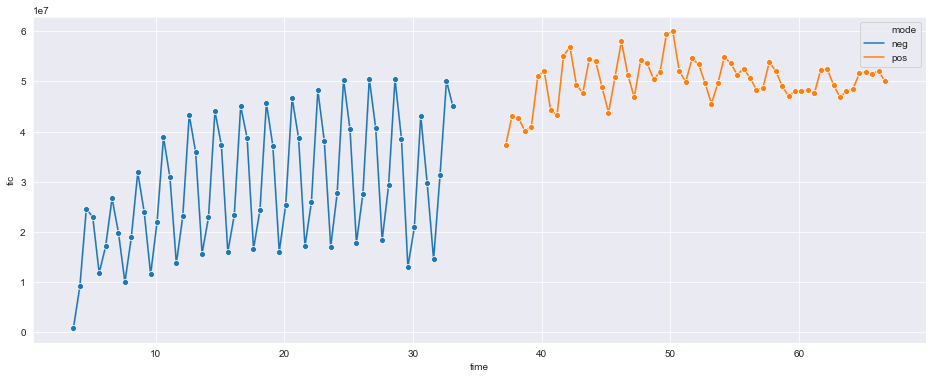

In [6]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=measurements, x='time', y='tic', markers=True, marker='o', hue='mode')
plt.show()

# Negative Mode

In [7]:
neg[neg.x==neg.x.max()]

,mode,scan,time,tic,x,y
102976,neg,59,29.1,38619300,1999.99,309


In [8]:
neg[neg.y==neg.y.max()]

,mode,scan,time,tic,x,y
101387,neg,59,29.1,38619300,393.22,6616878


<Figure size 2160x576 with 0 Axes>

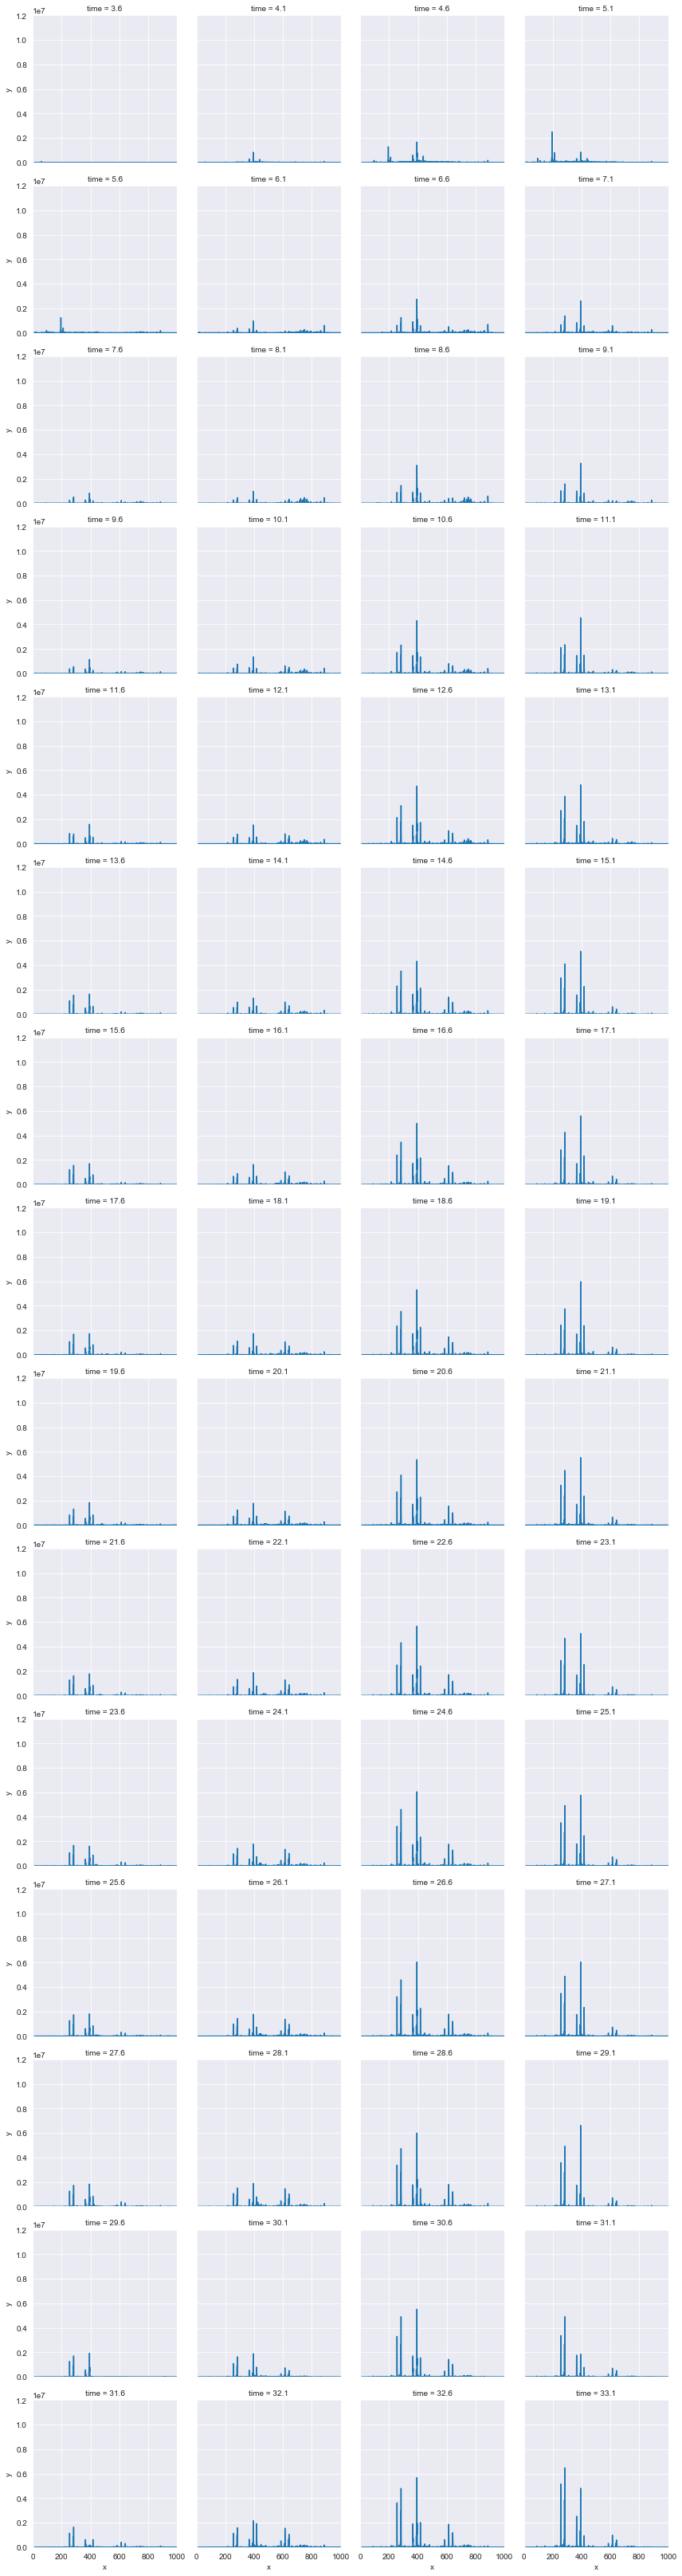

In [9]:
plt.figure(figsize=(30, 8))
g = sns.FacetGrid(neg, col = 'time', col_wrap=4, xlim=(0,1000),ylim=(0,12000000))
g.map(sns.lineplot, 'x', 'y')

# Positive Mode

In [10]:
pos[pos.x==pos.x.max()]

,mode,scan,time,tic,x,y
55544,pos,102,50.7,52024039,1999.98,6208
67455,pos,108,53.7,49609683,1999.98,2136
69434,pos,109,54.2,54841323,1999.98,4224


In [11]:
pos[pos.y==pos.y.max()]

,mode,scan,time,tic,x,y
117260,pos,134,66.7,49999537,178.97,11722927


<Figure size 2160x576 with 0 Axes>

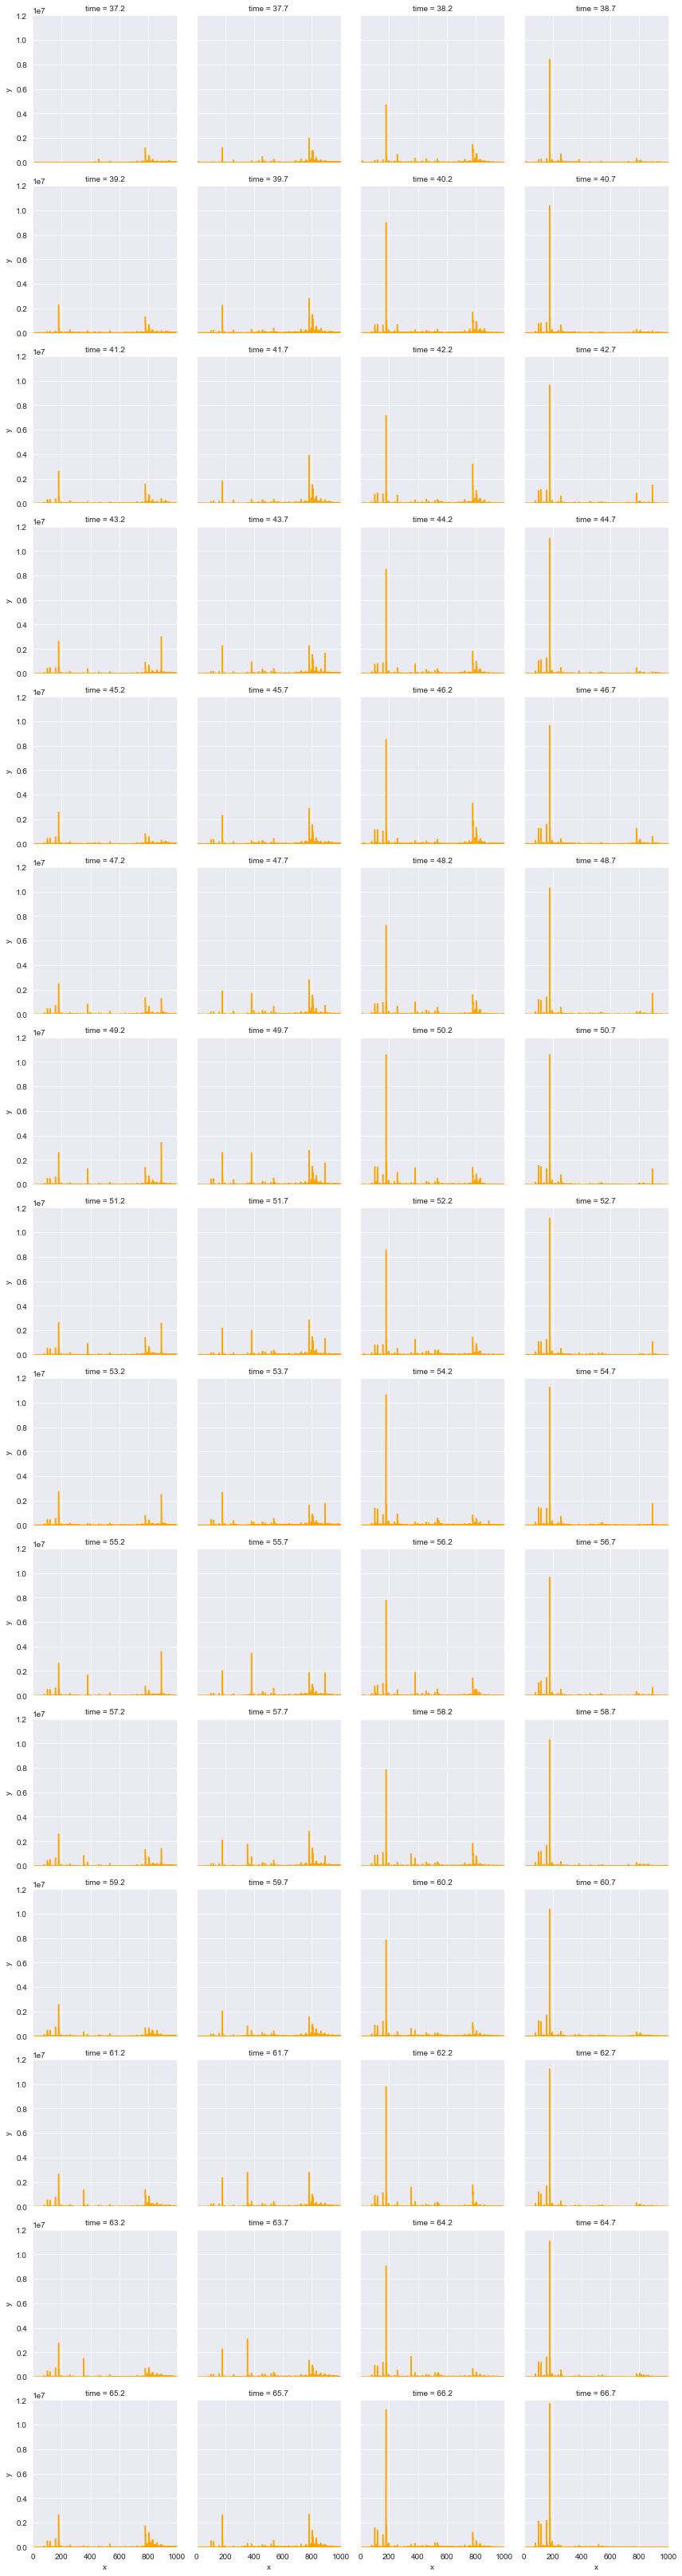

In [12]:
plt.figure(figsize=(30, 8))
g = sns.FacetGrid(pos, col = 'time', col_wrap=4, xlim=(0,1000),ylim=(0,12000000))
g.map(sns.lineplot, 'x', 'y', color='orange')